In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
ls centers*.txt

centers10.txt  centers29.txt  centers47.txt  centers65.txt  centers83.txt
centers11.txt  centers2.txt   centers48.txt  centers66.txt  centers84.txt
centers12.txt  centers30.txt  centers49.txt  centers67.txt  centers85.txt
centers13.txt  centers31.txt  centers4.txt   centers68.txt  centers86.txt
centers14.txt  centers32.txt  centers50.txt  centers69.txt  centers87.txt
centers15.txt  centers33.txt  centers51.txt  centers6.txt   centers88.txt
centers16.txt  centers34.txt  centers52.txt  centers70.txt  centers89.txt
centers17.txt  centers35.txt  centers53.txt  centers71.txt  centers8.txt
centers18.txt  centers36.txt  centers54.txt  centers72.txt  centers90.txt
centers19.txt  centers37.txt  centers55.txt  centers73.txt  centers91.txt
centers1.txt   centers38.txt  centers56.txt  centers74.txt  centers92.txt
centers20.txt  centers39.txt  centers57.txt  centers75.txt  centers93.txt
centers21.txt  centers3.txt   centers58.txt  centers76.txt  centers94.txt
centers22.txt  centers40.txt  centers59

In [28]:
def compute_rcm(n_cluster,centroids,labels):
    #since all the particles have the same mass, the center of mass is  just the arithmetic average weighted by the number of particles in each cluster 
    numerator = 0
    n_tot = 0
    for i in np.arange(n_cluster):
        N = len(np.where(labels==i)[0]) #number of particles in each cluster
#         print "n_clusters:", i 
#         print "nuumber of particles in each cluster ", N
#         print "cluster center" , centroids[i]    
        numerator += centroids[i]*N 
#         print "numerator: " , numerator
        n_tot+=N
    rcm = numerator/n_tot
    return rcm
def compute_avrg_rad(n_cluster,centroids,labels):
    numerator = 0
    n_tot = 0
    for i in np.arange(n_cluster):
        numerator += np.linalg.norm(centroids[i]-compute_rcm(n_cluster,centroids,labels))
    return numerator/n_cluster

In [29]:
def verify_cm_calculation(n_cluster,centroids,labels):
    fig  = plt.figure()
    plt.title("xy projection for n_cluster = ".format(n_cluster),fontsize=15)
    plt.plot(centers[:,0], centers[:,1],'o')
    rcm = compute_rcm(n_cluster,centroids,labels)
    plt.plot(rcm[0],rcm[1],"x", color = "red", markersize=13)
    rad = compute_avrg_rad(n_cluster,centroids,labels)
    circle1 = plt.Circle((rcm[0],rcm[1]),rad,color='g',fill=False)
    fig.gca().add_artist(circle1)
    plt.xlabel("X",fontsize=13)
    plt.ylabel("Y",fontsize=13)
    axes().set_aspect('equal', 'datalim')

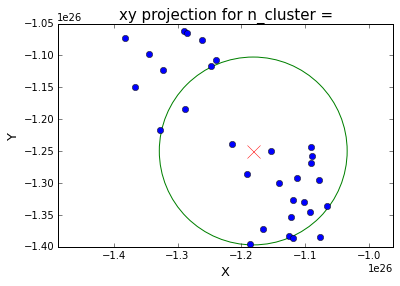

In [30]:
centers = np.loadtxt("centers30.txt")
labels = np.loadtxt("labels30.txt")
verify_cm_calculation(30,centers,labels)

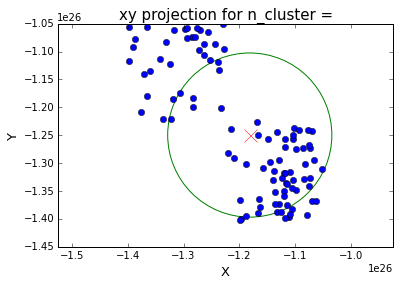

In [32]:
centers = np.loadtxt("centers99.txt")
labels = np.loadtxt("labels99.txt")
verify_cm_calculation(99,centers,labels)

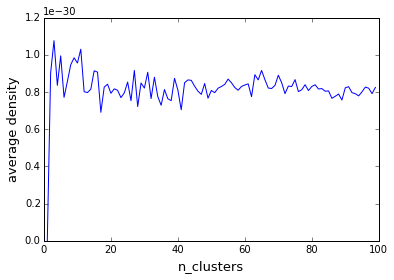

In [36]:
densities = np.loadtxt("densities.txt")
plt.plot(np.arange(1,100),np.array(densities))
plt.xlabel("n_clusters",fontsize=13)
plt.ylabel("average density",fontsize=13)

In [38]:
import yt
ds = yt.load("../ds14_scivis_0128_e4_dt04_1.0000")
ad = ds.all_data()
x = ad[("all","particle_position_x")]

yt : [INFO     ] 2015-10-30 14:25:51,668 Calculating time to be 4.344e+17 seconds
yt : [INFO     ] 2015-10-30 14:25:51,706 Parameters: current_time              = 4.3437787319e+17
yt : [INFO     ] 2015-10-30 14:25:51,706 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2015-10-30 14:25:51,707 Parameters: domain_left_edge          = [-45417.41686962 -45417.41686962 -45417.41686962]
yt : [INFO     ] 2015-10-30 14:25:51,708 Parameters: domain_right_edge         = [ 45417.41686962  45417.41686962  45417.41686962]
yt : [INFO     ] 2015-10-30 14:25:51,709 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2015-10-30 14:25:51,709 Parameters: current_redshift          = 2.48886713461e-08
yt : [INFO     ] 2015-10-30 14:25:51,710 Parameters: omega_lambda              = 0.704962
yt : [INFO     ] 2015-10-30 14:25:51,710 Parameters: omega_matter              = 0.295038
yt : [INFO     ] 2015-10-30 14:25:51,711 Parameters: hubble_constant           = 0.688062
yt : [INFO     ] 

In [39]:
shape(x)

(2097152,)

So total of 2097152 particles, I will probably run this for all of them 

In [40]:
2097152/4

524288